In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
dataset = pd.read_excel("/Users/eupirate/Documents/DA_L7/L7_term2/wk3_canada.xlsx", 
                        sheet_name = "Canada by Citizenship",
                        skiprows = range(20))
dataset.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# we remove the columns that will not be used

dataset.drop(["AREA","REG","DEV"], axis=1, inplace = True)
#dataset.head()

In [4]:
dataset['Total_Immigrants'] = dataset.iloc[:, 9:].sum(axis=1)

#dataset['Total'] = dataset.sum(axis=1)
dataset.head()

,Type,Coverage,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Immigrants
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58545
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,15698
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69221
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,5
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
# we set an index to locate the data by country

dataset.set_index("OdName", inplace = True)

In [6]:
# we want to check Haiti

print(dataset.loc["Haiti"])


Type                                     Immigrants
Coverage                                 Foreigners
AreaName            Latin America and the Caribbean
RegName                                   Caribbean
DevName                          Developing regions
1980                                           1666
1981                                           3692
1982                                           3498
1983                                           2860
1984                                           1418
1985                                           1321
1986                                           1753
1987                                           2132
1988                                           1829
1989                                           2377
1990                                           2379
1991                                           2829
1992                                           2399
1993                                           3655
1994        

In [7]:
# we want to check 2013

print(dataset.loc["Haiti",2013])

4152


In [8]:
# conver year to string to start plotting

dataset.columns = list(map(str,dataset.columns)) 
[print(type(x)) for x in dataset.columns.values]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
# new we visualize the data, we'll see X = Year, Y = No. of immigrants 
# we set a range of years from 1980 to 2013 ( 2013 + 1 = 2014 )

years = list(map(str,range(1980,2014)))

Text(0.5, 0, 'Year')

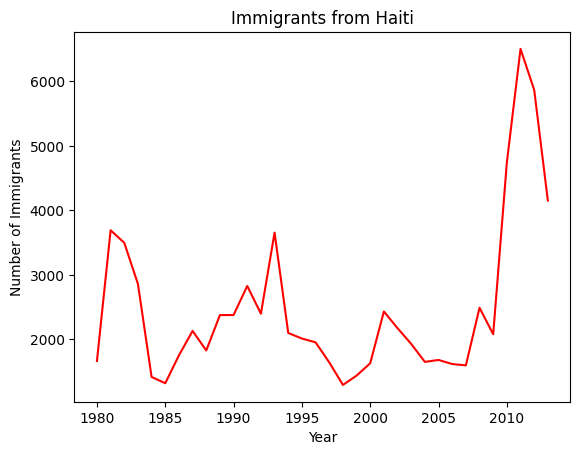

In [10]:
# we want to see No. of immigratns in Haiti from 1980 to 2013

dataset.loc["Haiti", years].plot(kind = "line", color = "red")
plt.title("Immigrants from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")

Text(20, 6000, 'Earthquake 2010')

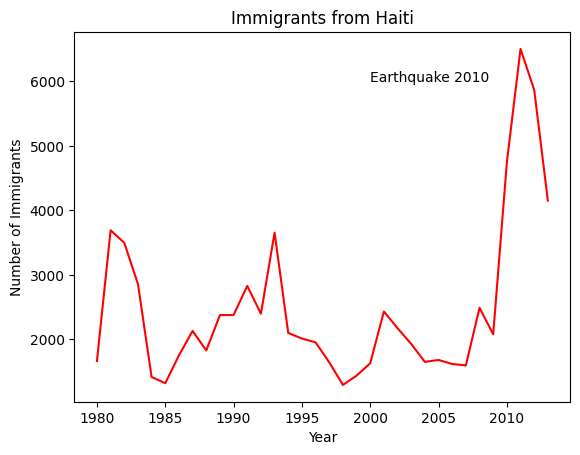

In [11]:
# we want to add text to mention the earthquake

# we want to see No. of immigratns in Haiti from 1980 to 2013

dataset.loc["Haiti", years].plot(kind = "line", color = "red")
plt.title("Immigrants from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")
plt.text( 20, 6000, "Earthquake 2010")

Text(0.5, 0, 'Year')

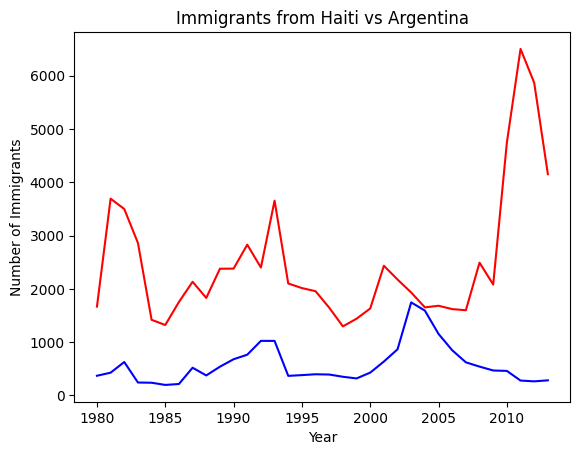

In [12]:
# we want to compare Haiti vs Argentina

dataset.loc["Haiti", years].plot(kind = "line", color = "red")
dataset.loc["Argentina", years].plot(kind = "line", color = "blue")
plt.title("Immigrants from Haiti vs Argentina")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")


Text(20, 6000, 'Earthquake 2010')

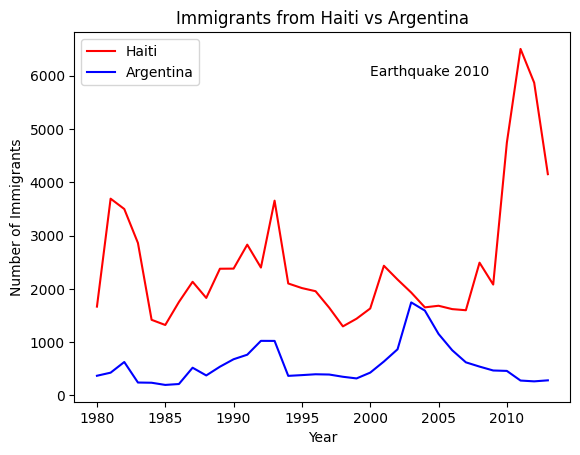

In [13]:
# we want to compare Haiti vs Argentina

dataset.loc["Haiti", years].plot(kind = "line", color = "red")
dataset.loc["Argentina", years].plot(kind = "line", color = "blue")
plt.title("Immigrants from Haiti vs Argentina")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")
plt.legend(["Haiti","Argentina"])
plt.text( 20, 6000, "Earthquake 2010")

# Area plot

In [14]:
#remove the row with label 'Total'
dataset = dataset[dataset.index !='Total']
dataset = dataset[dataset.index !='Unknown']

In [15]:
# we organise the dta from the largest to smallest

dataset.sort_values(["Total_Immigrants"],ascending = False, axis = 0, inplace = True)
dataset.head()

,Type,Coverage,AreaName,RegName,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Immigrants
OdName,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,666207
China,Immigrants,Foreigners,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,644849
Philippines,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,494170
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,484039
Pakistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,978,972,1201,900,668,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,238449


In [16]:
# we select the top 5 countries to create the area plot

top5 = dataset[years].head(5).transpose()
top5.head()

OdName,India,China,Philippines,United Kingdom of Great Britain and Northern Ireland,Pakistan
1980,8880,5123,6051,22045,978
1981,8670,6682,5921,24796,972
1982,8147,3308,5249,20620,1201
1983,7338,1863,4562,10015,900
1984,5704,1527,3801,10170,668


Text(0.5, 0, 'Year')

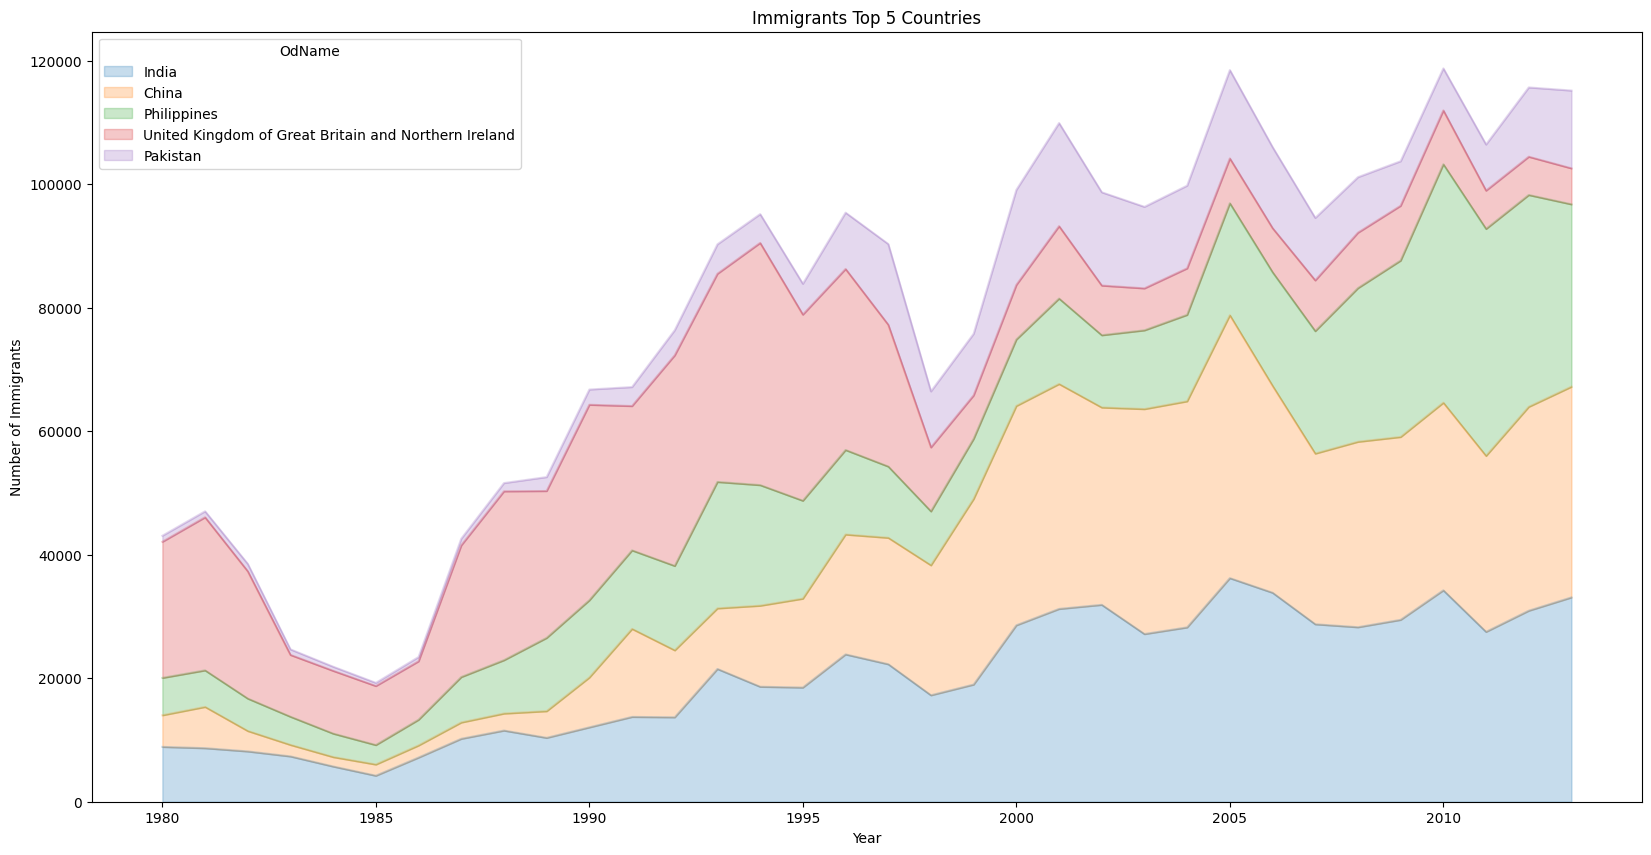

In [17]:
# we create the plot

top5.plot(kind = "area",
         alpha = 0.25,
         figsize = (20,10),)
plt.title("Immigrants Top 5 Countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")